# AGRIBALYSE - Synthèse
# EXPLORATION DES DONNEES (partie 3)


🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜

🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕

🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖

🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 

♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ 
♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ 

Nous reprenons certains éléments des parties précédentes.  
La partie 3 commence au paragraphe du 4e niveau d'exploration. 

# Pour commencer

## Librairies

In [1]:
# general
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

# plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
## fixer le theme
import plotly.io as pio
pio.templates.default = 'ggplot2'

# scikit-learn
## Métriques
from sklearn.metrics import silhouette_score
## Clustering
from sklearn.cluster import KMeans

# yellowbrick
## Clustering
from yellowbrick.cluster import SilhouetteVisualizer

# Données

In [2]:
# importation des données
synthese_data = pd.read_csv('datasets/Agribalyse_Synthese.csv', header=0)

In [3]:
# augmenter le nombre de colonnes visibles
pd.set_option("display.max_columns", 40)

In [4]:
synthese_dataset = synthese_data.copy()

In [5]:
target = "DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"

In [6]:
synthese_dataset = synthese_dataset.drop(['Code AGB', 'Code CIQUAL'], axis=1)

In [7]:
# suppression de "Nom du Produit en Français"
synthese_dataset = synthese_dataset.drop(["Nom du Produit en Français"], axis=1)

In [8]:
# suppression de 'LCI Name'
synthese_dataset = synthese_dataset.drop(['LCI Name'], axis=1)

In [9]:
synthese_dataset = synthese_dataset.drop(["Saisonnalité"], axis=1)

In [10]:
# suppression de la colonne "Transport par avion (1 : par avion)"
synthese_dataset = synthese_dataset.drop(["Transport par avion (1 : par avion)"], axis=1)

In [11]:
plastique_emballage = ['PS', 'LPDE', 'PP', 'Déjà emballé - PET', 'V (PVC)', 'Bouteille PETE',  'HPDE',
                       'Déjà emballé - PP/PE', 'Déjà emballé - LDPE', 'PVC', 'Bouteille PET',]

# 4e niveau d'exploration

Après une analyse essentiellement graphique, nous complétons par quelques statistiques. 

## Relation variable Quantitative / variable Catégorielle

### Indicateur $\eta^2$

On utilise un indicateur appelé le **rapport de corrélation** $\eta^2$ :
* c'est un nombre compris entre 0 et 1
* si $\eta^2$=0, il n’y a pas a priori de relation entre les variables
* si $\eta^2$=1, il n’existe pas a priori de relation entre les variables.

Précisions [(cours Open Classroom)](https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4774896-analysez-une-variable-quantitative-et-une-qualitative-par-anova) :
 $$ SCT = \sum_j (y_j - \bar y)^2 $$ 
 $$ SCE = \sum_j n_j (\bar{y_j} - \bar y)^2$$
 $$ \eta^2 = \frac{SCE}{SCT}$$
 
 avec
 * $y_j$ : j-ième valeur de y
 * $\bar y$ : moyenne des valeurs de y
 * $\bar {y_j}$ : moyenne des valeurs de la classe j
 * $n_j$ : taille de la classe j.

 
### Fonction pour calculer $\eta^2$
 
On commence par définir une fonction pour calculer $\eta^2$.

In [12]:
# arguments :
## x : variable catégorielle 
## y : variable quantitative

def eta_squared(x,y):
    # moyenne de y (y^bar)
    moyenne_y = y.mean()
    
    # on récupère dans une liste les informations sur les classes sous forme de dictionnaire :
    # taille de la classe (n_i) et moyenne de la classe (yi^bar)
    classes = []
    
    # on fait une boucle sur les classes
    # pour chaque classe :
    # récupérer les valeurs de y relative à la classe (y_i)
    # récupérer la taille de la classe (n_i) et la moyenne de la classe (y_i^bar)
    
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
        
    # on calcule :
    # la variation totale SCT
    # la variation interclasse SCE
    # on retourne le rapport de corrélation eta^2
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

### Application

#### Relation Target-Variable Catégorielle

cf 2e niveau d'exploration

In [14]:
col1 = target
# colonnes type 'object'
col_object_no_target = synthese_dataset.select_dtypes(object).columns

for col2 in col_object_no_target :
    print("{} et {} : \n{:.2f}".format(col2,col1,eta_squared(synthese_dataset[col2], synthese_dataset[col1])))
    print()

Groupe d'aliment et DQR - Note de qualité de la donnée (1 excellente ; 5 très faible) : 
0.14

Sous-groupe d'aliment et DQR - Note de qualité de la donnée (1 excellente ; 5 très faible) : 
0.54

Livraison et DQR - Note de qualité de la donnée (1 excellente ; 5 très faible) : 
0.08

Matériau d'emballage et DQR - Note de qualité de la donnée (1 excellente ; 5 très faible) : 
0.06

Préparation et DQR - Note de qualité de la donnée (1 excellente ; 5 très faible) : 
0.07



Les valeurs de $\eta^2$ sont relativement faibles :  
Il n'existe pas a priori de relation entre les variables "Livraison", "Matériau d'emballage", "Préparation" et la variable cible.   

#### Relation variable Quantitative (sans target) - variable Catégorielle 

cf 3e niveau d'exploration

In [16]:
# colonnes type 'float' sans la variable cible
col_float_no_target = synthese_dataset.select_dtypes(float).drop(target,axis=1).columns

for col1 in col_float_no_target:
    for col2 in col_object_no_target :
        print("{} et {} : \n{:.2f}".format(col2,col1,eta_squared(synthese_dataset[col2], synthese_dataset[col1])))
        print()

Groupe d'aliment et Score unique EF (mPt/kg de produit) : 
0.39

Sous-groupe d'aliment et Score unique EF (mPt/kg de produit) : 
0.53

Livraison et Score unique EF (mPt/kg de produit) : 
0.13

Matériau d'emballage et Score unique EF (mPt/kg de produit) : 
0.24

Préparation et Score unique EF (mPt/kg de produit) : 
0.24

Groupe d'aliment et Changement climatique (kg CO2 eq/kg de produit) : 
0.28

Sous-groupe d'aliment et Changement climatique (kg CO2 eq/kg de produit) : 
0.50

Livraison et Changement climatique (kg CO2 eq/kg de produit) : 
0.10

Matériau d'emballage et Changement climatique (kg CO2 eq/kg de produit) : 
0.22

Préparation et Changement climatique (kg CO2 eq/kg de produit) : 
0.20

Groupe d'aliment et Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) : 
0.00

Sous-groupe d'aliment et Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) : 
0.02

Livraison et Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) : 
0.00

M

Il n'y a a priori pas de relation forte entre les variables catégorielles et quantitatives.  

Beaucoup de variables sont a priori indépendantes :
* Groupe d'aliment et Appauvrissement de la couche d'ozone
* Sous-groupe d'aliment et Appauvrissement de la couche d'ozone
* Matériau d'emballage et Appauvrissement de la couche d'ozone
* Préparation et Appauvrissement de la couche d'ozone 
* Livraison et Rayonnements ionisants
* Préparation et Rayonnements ionisants
* Livraison et Formation photochimique d'ozone 
* Groupe d'aliment et Eutrophisation eaux douces 
* Matériau d'emballage et Eutrophisation eaux douces
* Préparation et Eutrophisation eaux douces. 

## Relation variable Catégorielle- variable Catégorielle

cf 3e niveau d'exploration

### Table de contingence avec indicateur de dépendance

Ici, on ne peut pas utiliser le test du khi2 vu que la condition asymptotique n'est pas vérifiée (ie : les effectifs ne sont pas tous supérieurs à 5).  

Nous allons colorer les cases non pas avec l'effectif mais avec une valeur qui donne une indication sur l'indépendence des deux variables.   

Les idées :
* on mesure l'écart entre l'effectif observé (une cellule de la table $n_{ij}$) et l'effectif attendu en cas d'indépendance (produit des deux totaux divisé par l'effectif total  $\frac{n_{i.} n_{.j}}{n}$ ) 
$$n_{ij} - \frac{n_{i.} n_{.j}}{n}$$
* on transforme pour avoir un nombre entre 0 et 1 :
$$(n_{ij} - \frac{n_{i.} n_{.j}}{n})^2$$
$$\xi_{ij} = \frac{(n_{ij} - \frac{n_{i.} n_{.j}}{n})^2}{ \frac{n_{i.} n_{.j}}{n}}$$
$$\xi_n = \sum_i \sum_j\xi_{ij}$$
$${\xi_{ij}}_{normalisé} = \frac {\xi_{ij}}{\xi_n}$$
* on peut voir ce nombre comme une contribution à la non-indépendance des deux variables 
* plus la case a un indicateur élevé (couleur claire ici), plus la case est source de non-indépendance.  

Pour des précisions : [cours Open Classroom](https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2)

### Fonction pour construire la table avec indicateur de dépendance

In [17]:
# construisons d'abord une fonction 
# qui prend : (1) le dataset (2) les deux variables catégorielles
# et retourne : (1) la table de contingence (2) la table des xi_{ij} normalisée

def table_xi_normalisee(dataset, var1, var2):
    # table de contingence 
    # on rajoute les totaux 
    # on remplace les NaN par 0
    cont = dataset[[var1, var2]].pivot_table(index=var1, columns=var2, 
                                             aggfunc=len,
                                             margins=True, margins_name="Total").fillna(0) 

    tx = cont.loc[:,["Total"]]         # total en colonne 
    ty = cont.loc[["Total"],:]         # total en ligne     #\sum_j (\hat{y_j} - \bar y)^2
    n = len(dataset)                   # effectif total
    indep = tx.dot(ty) / n             # produit des deux totaux divisé par l'effectif total  𝑛_𝑖. * 𝑛_.𝑗 / 𝑛  

    measure = (cont-indep)**2/indep    # xi_{ij}
    xi_n = measure.sum().sum()
    table = measure/xi_n               # xi_{ij} normalisé
    
    return cont, table

# notons qu'on obtient des couleurs identiques que l'on prenne \x_ij ou la version normalisée

### Application

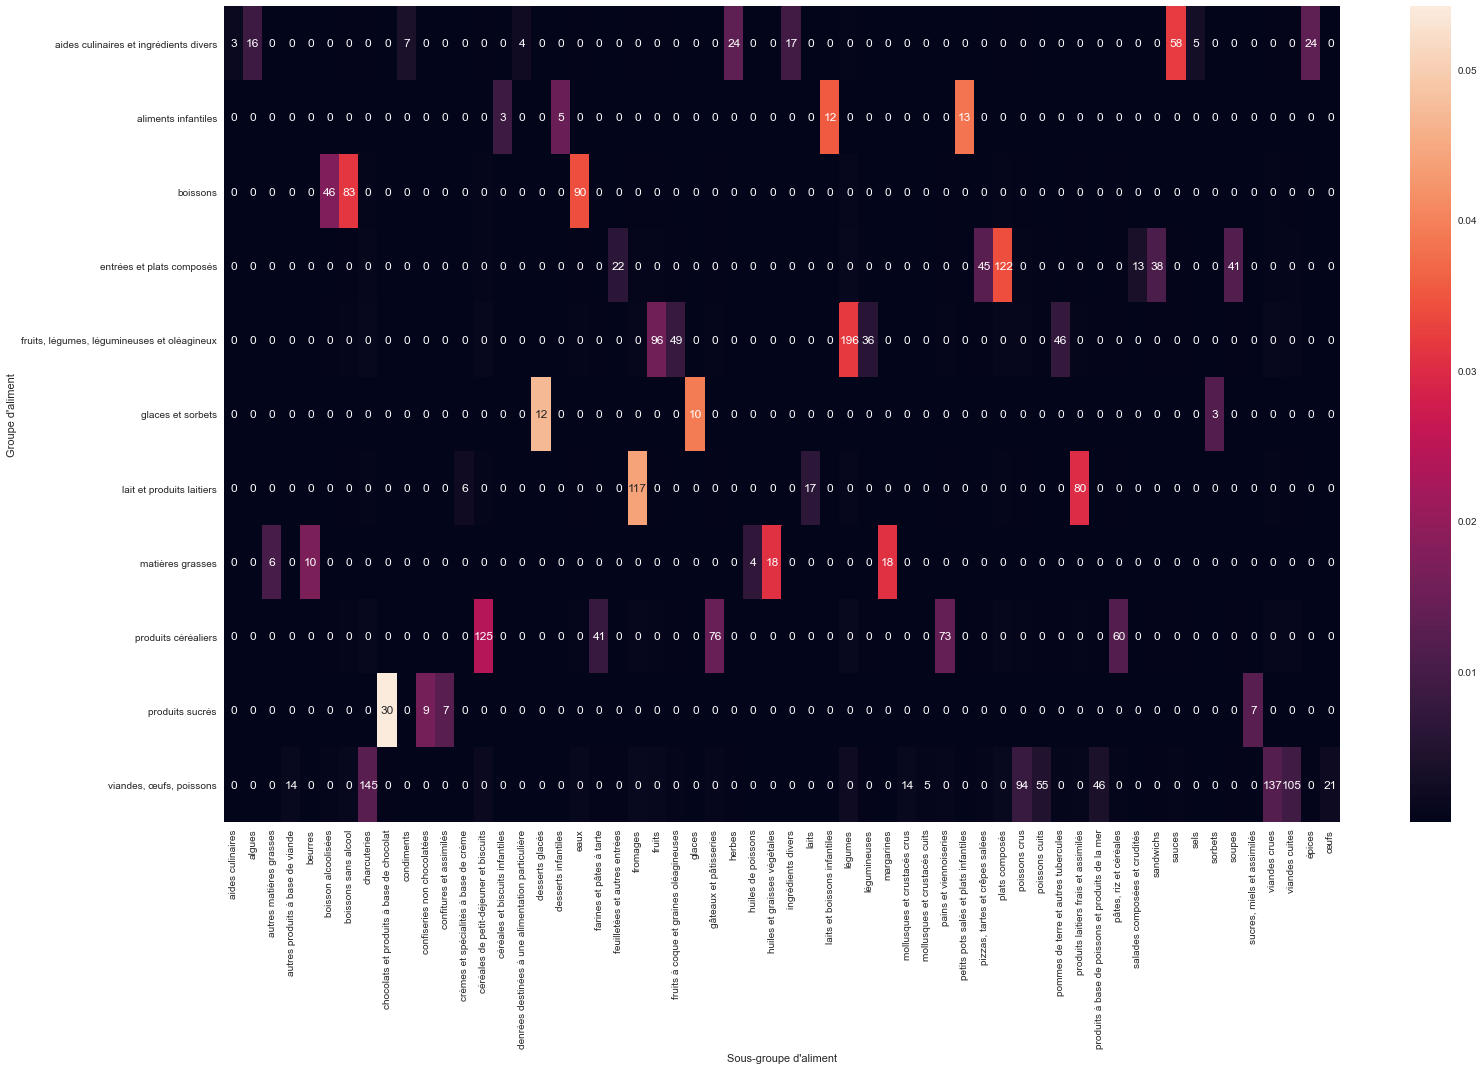

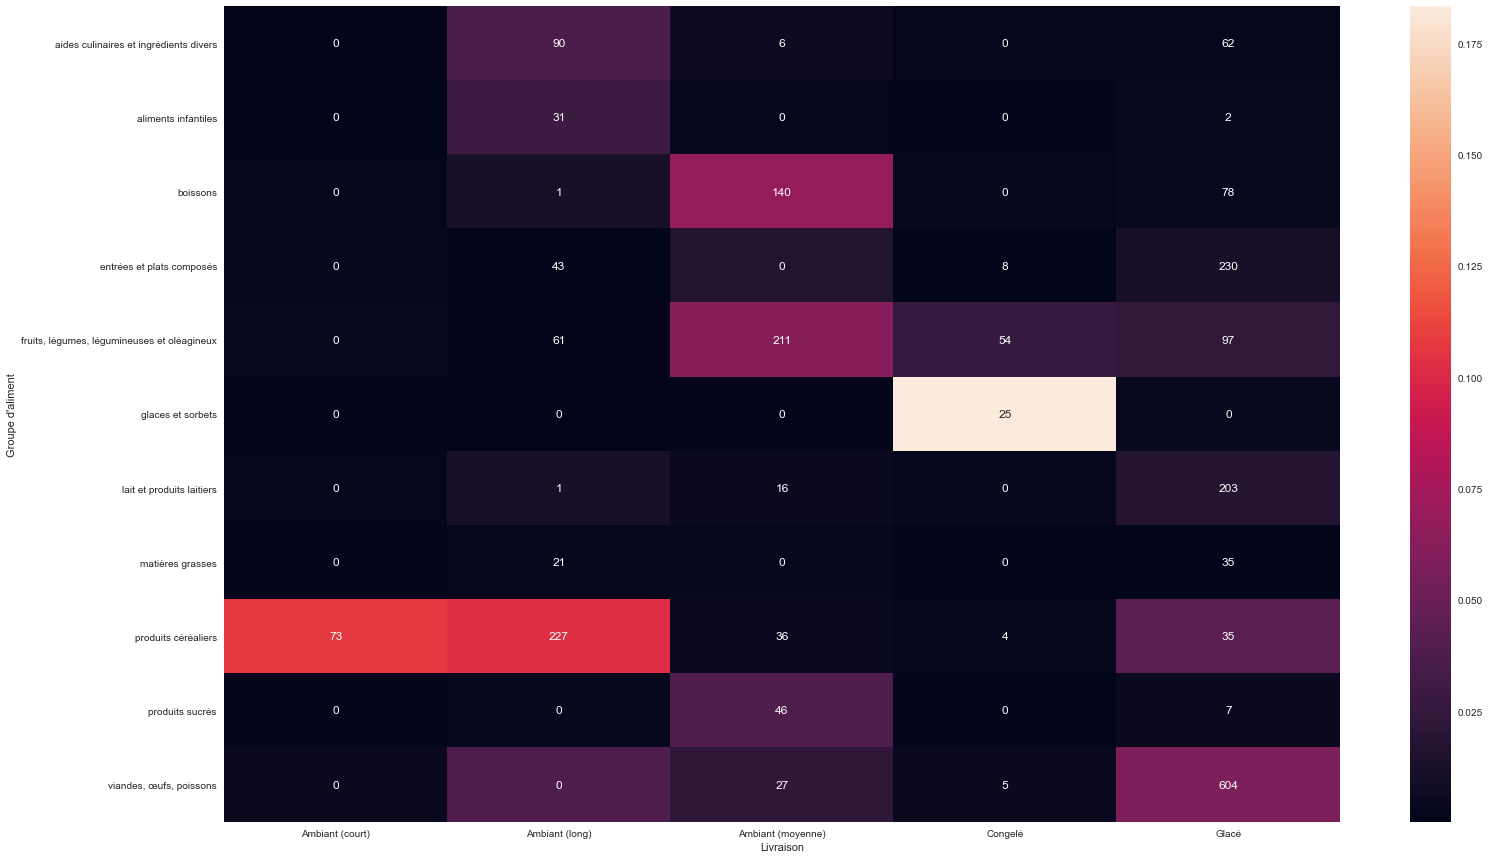

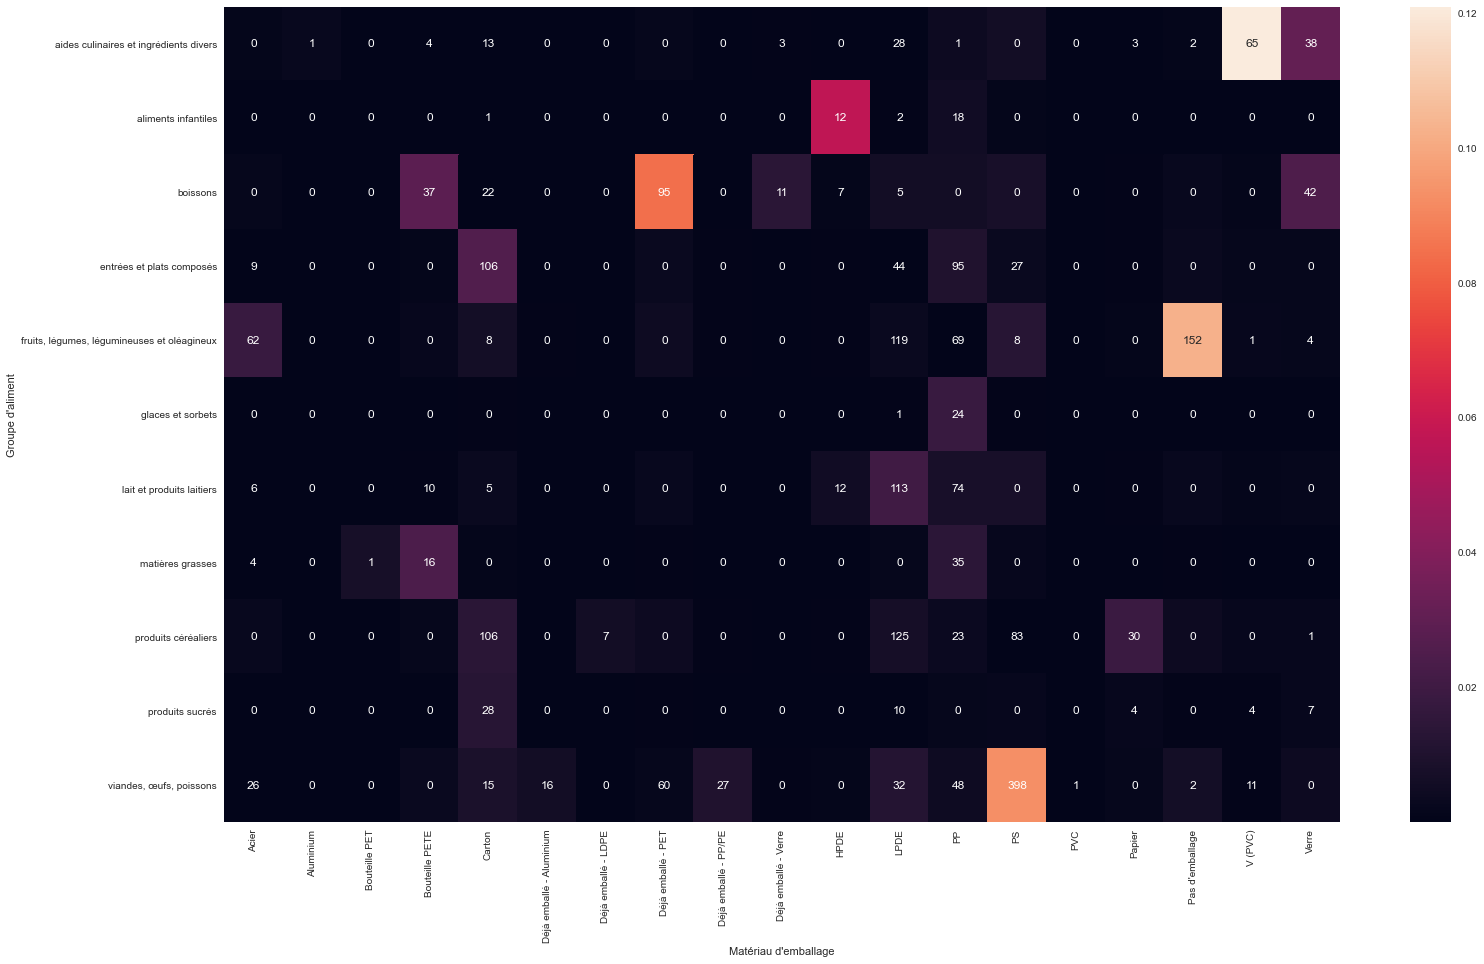

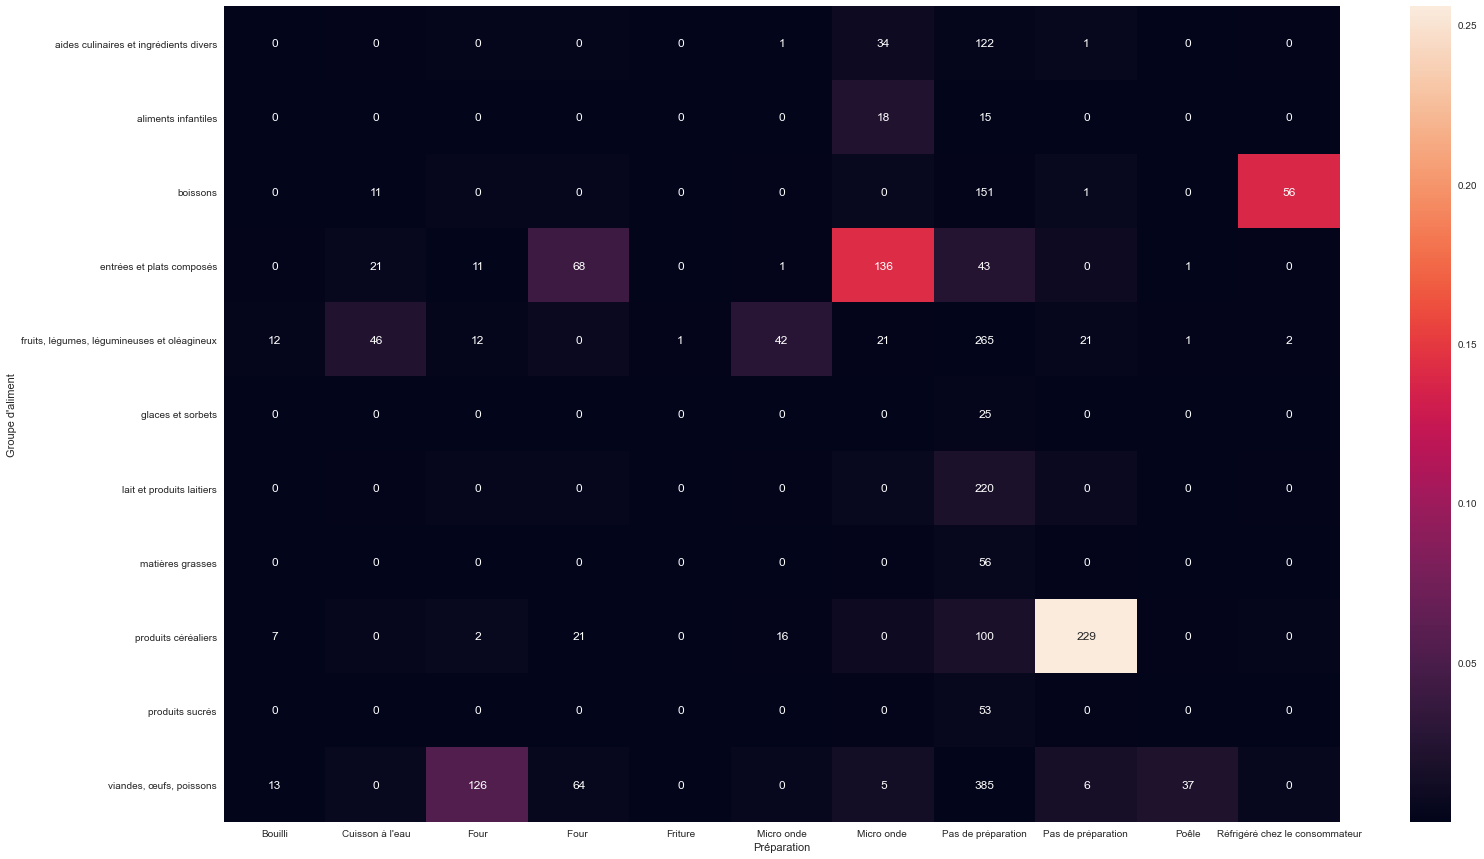

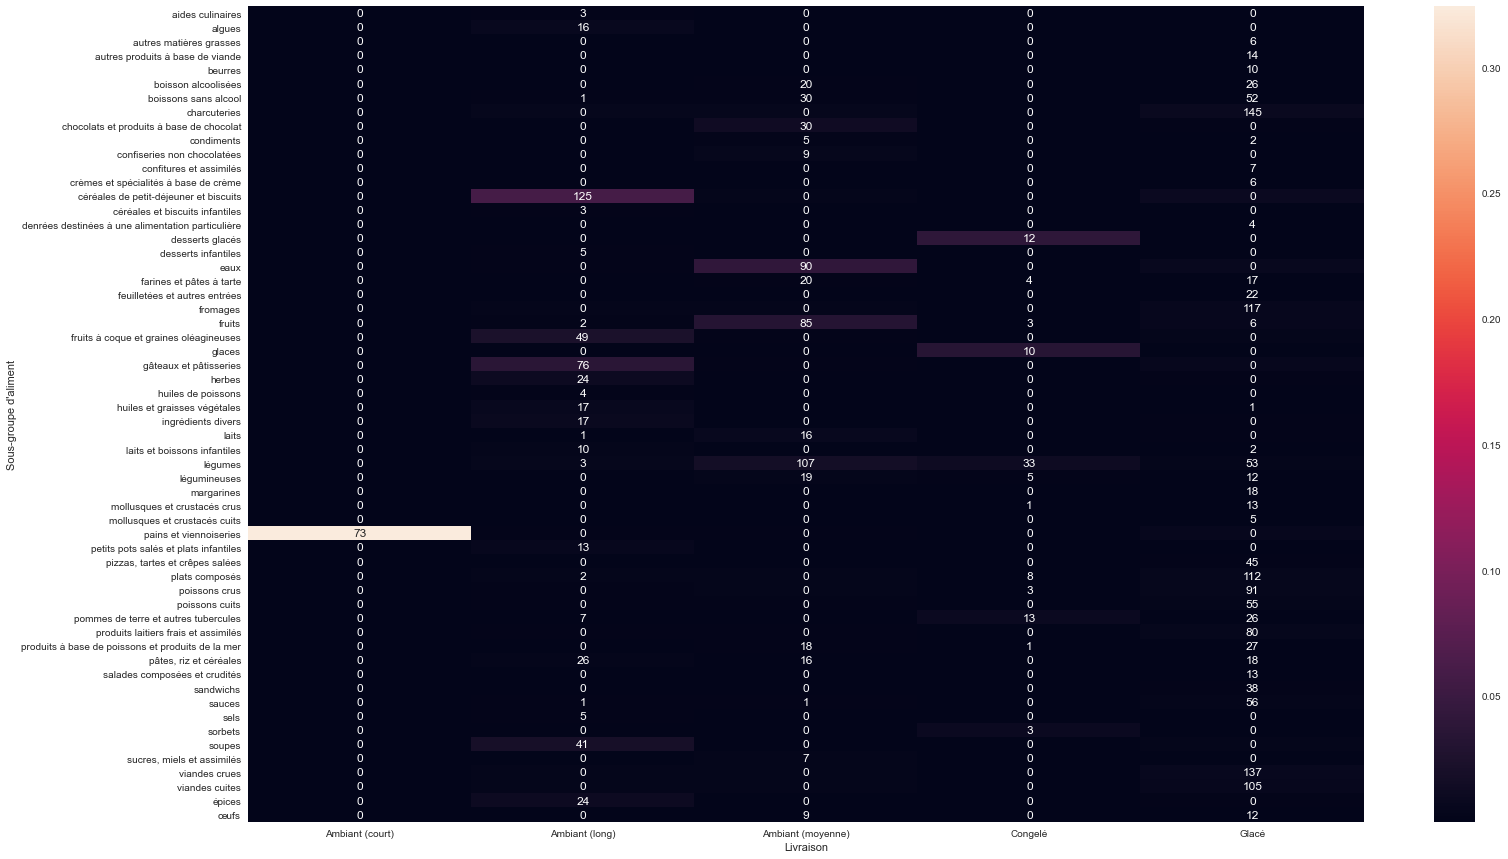

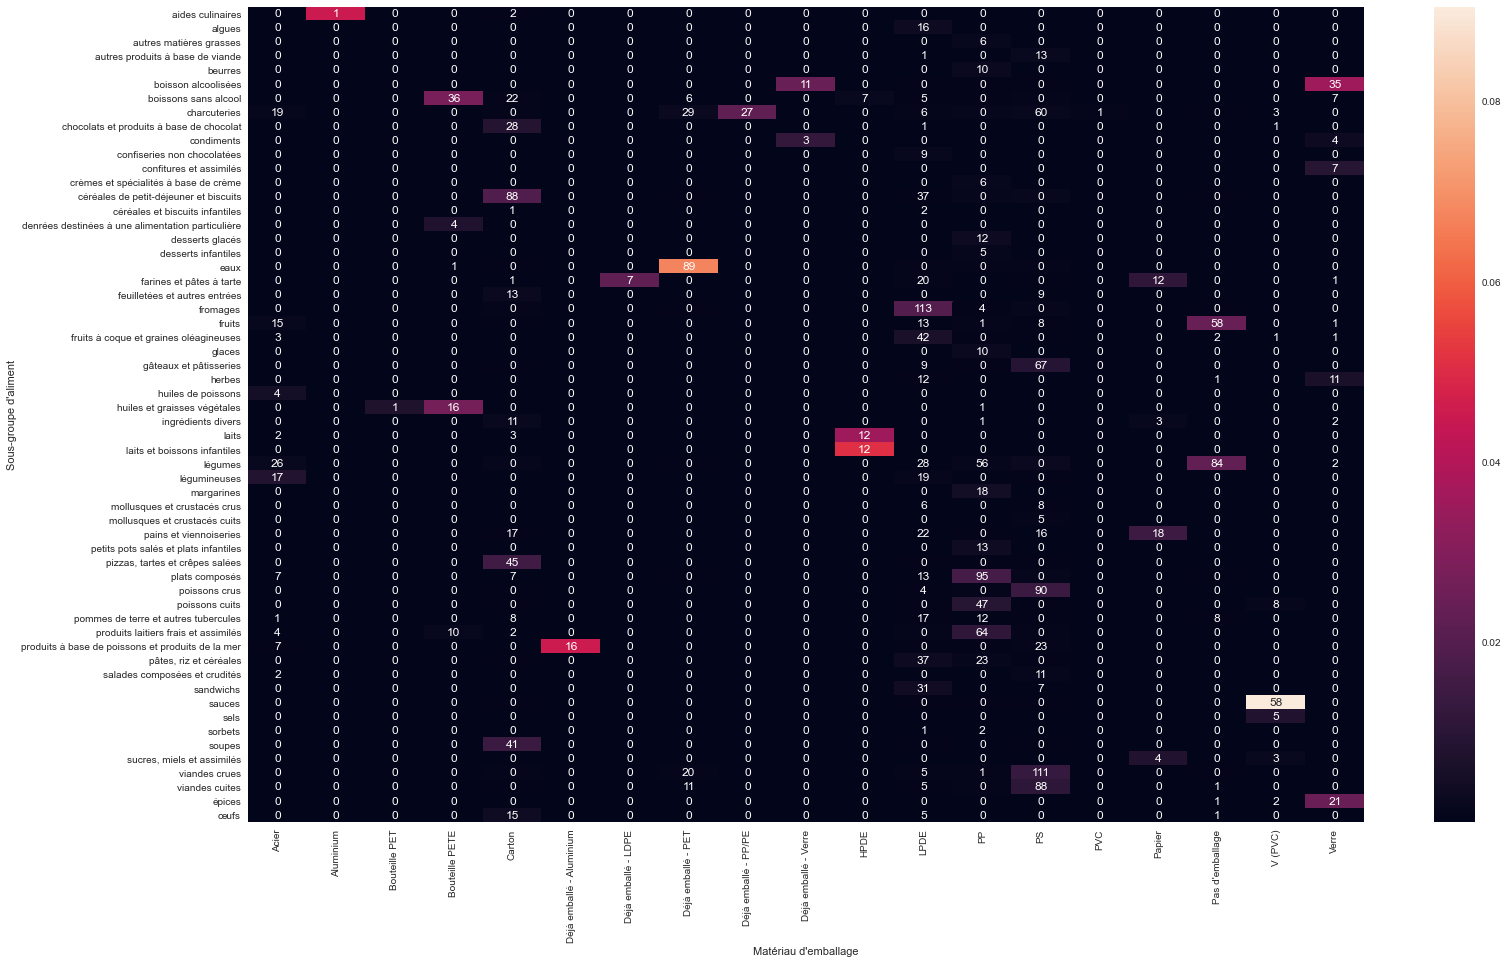

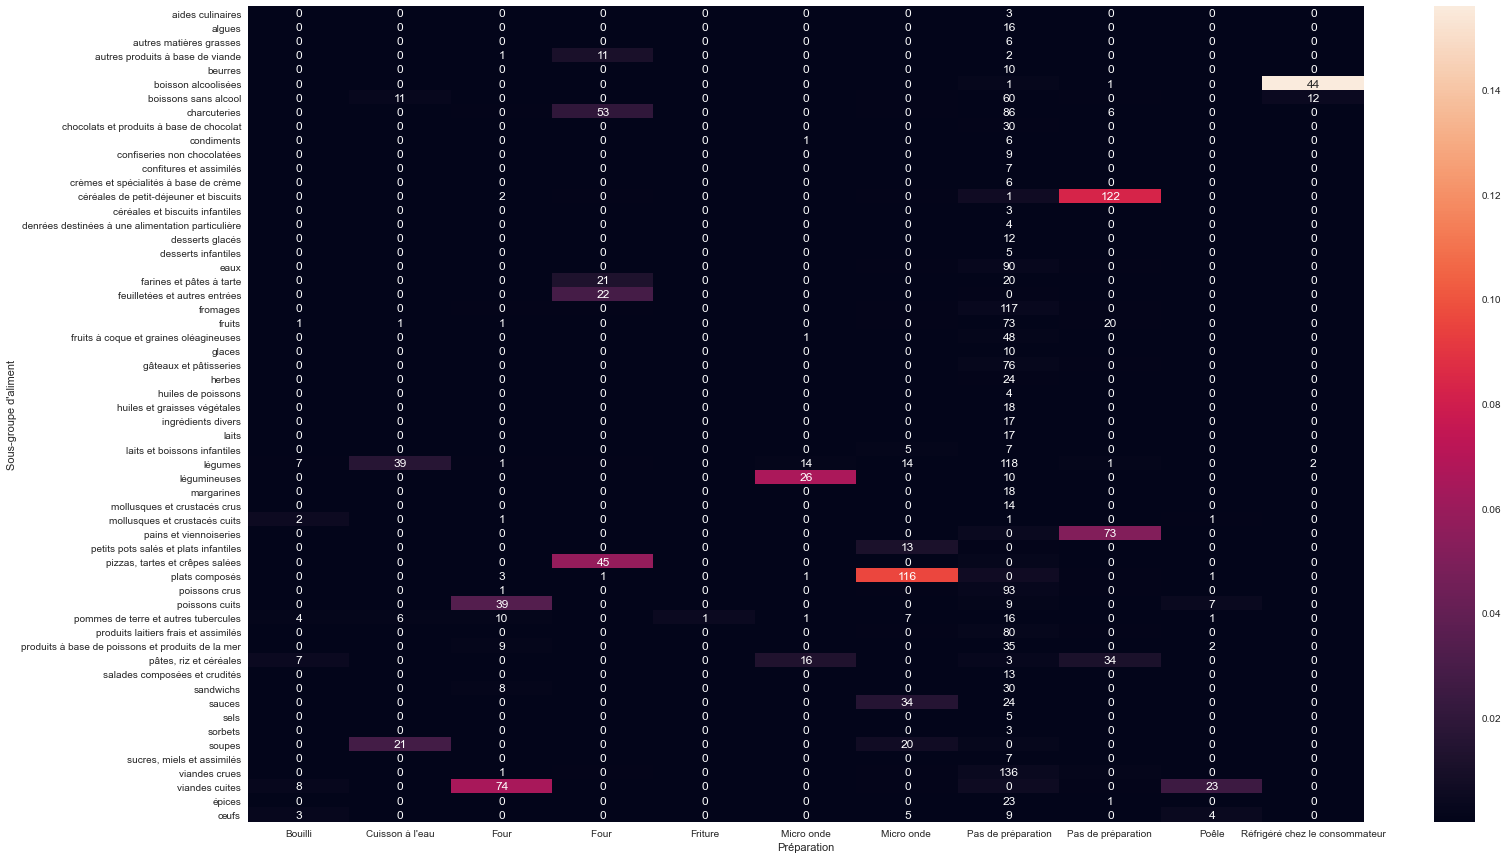

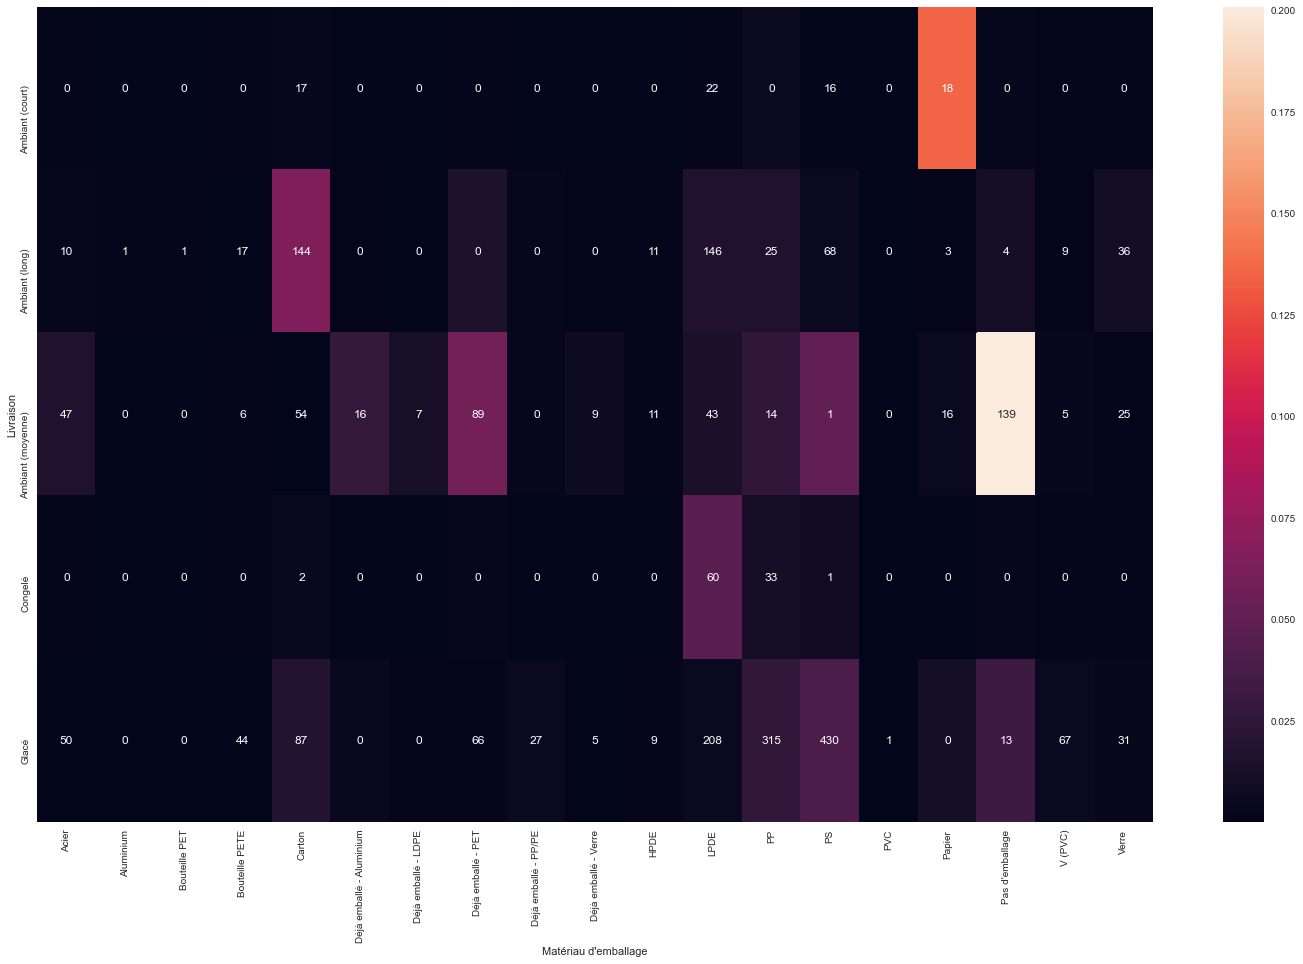

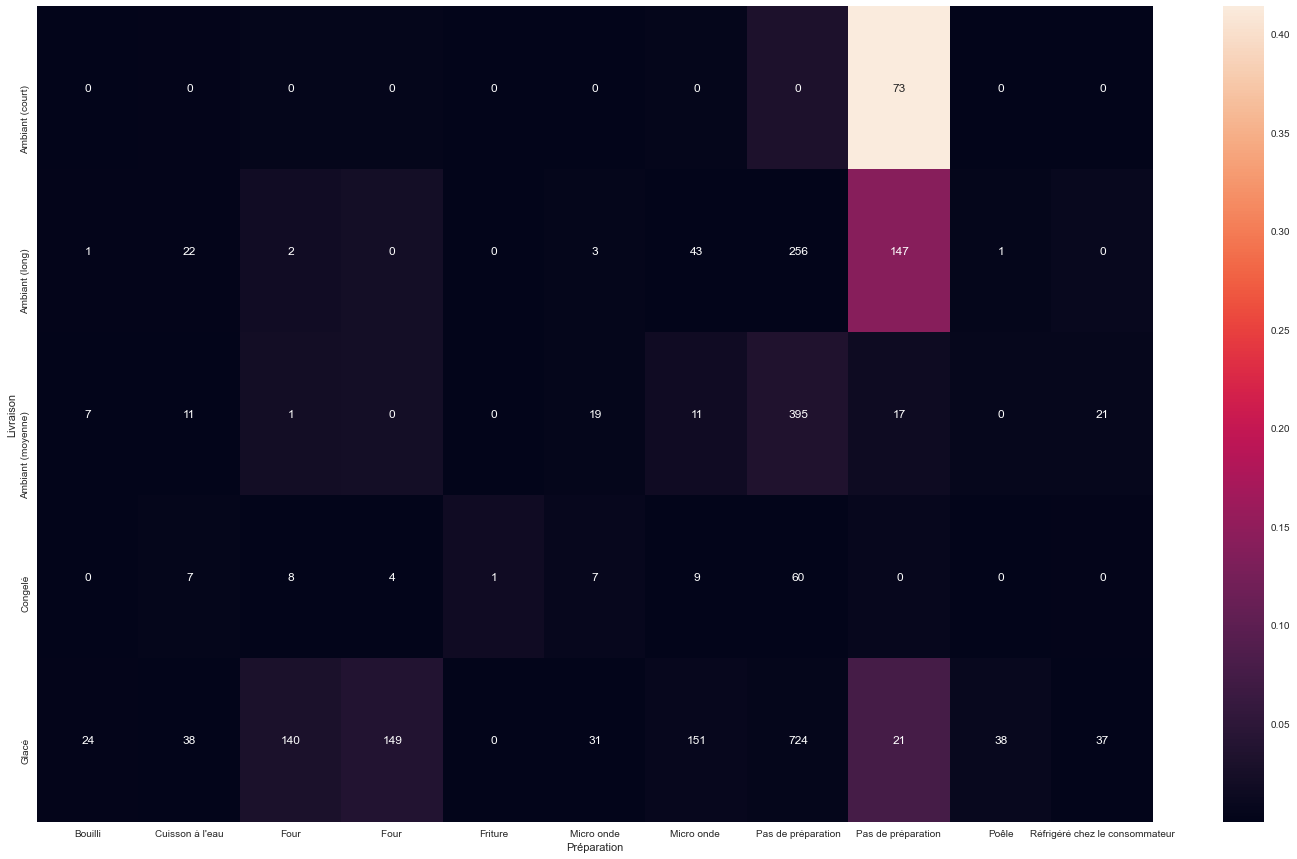

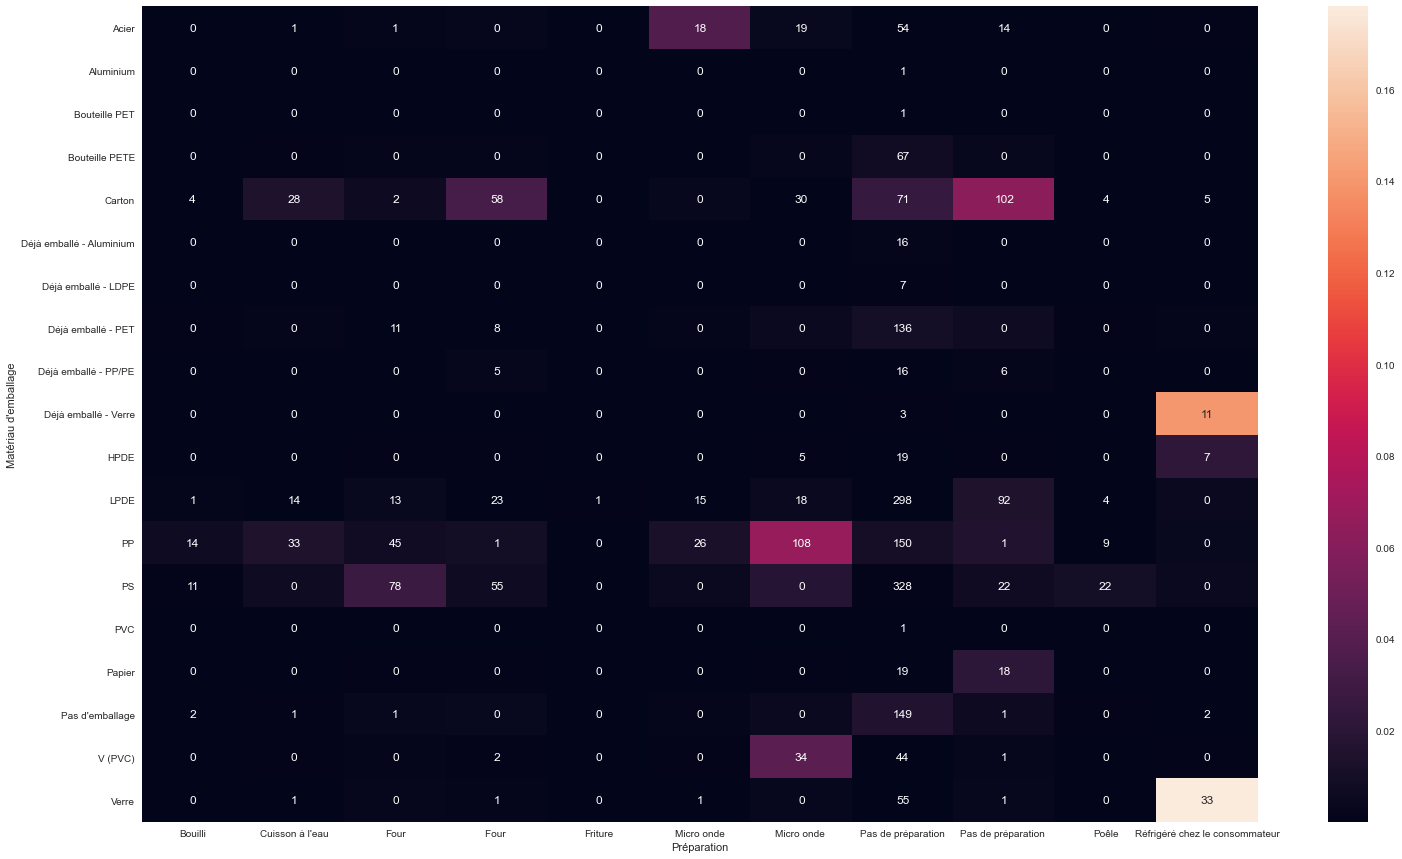

In [18]:
# on va faire deux boucles for imbriquées
# on met dans la liste 'list_col_used' les catégories ('col1') déjà utilisées dans la 1e boucle pour ne pas les réutiliser dans la 2e boucle ('col2')
list_col_used = []

for col1 in col_object_no_target:
    list_col_used.append(col1)
    for col2 in col_object_no_target:
        if col2 not in list_col_used:
            # récupérer la table de contingence et la table des xi_ij normalisée avec la fonction précédente
            cont, table = table_xi_normalisee(synthese_dataset, col1, col2)
            # afficher avec un heatmap 
            plt.figure(figsize=(25,15))
            sns.heatmap(table.iloc[:-1,:-1], annot=cont.iloc[:-1,:-1], fmt='.0f')    # on affiche toujours les effectifs, pas l'indicateur, qui est représenté par la couleur 
                                                                                    # on enlève les colonnes des totaux
            plt.show() 

Observons les cases les plus claires (indicateurs de dépendance les plus élevées) :
* Certaines relations sont plutôt attendues : 
    * les produits sucrés sont surtout des produits chocolatés
    * les glaces et sorbets sont livrés congelés
* Certaines donnent quelques précisions sur certaines catégories :
    * les aides culinaires et ingrédients divers sont emballés avec du plastique V(PVC)
    * les produits céréaliers sont surtout sans préparation
    * la livraison 'Ambiant (court)' concernent uniquement les 'pains et viennoiseries'
    * les sauces sont emballés avec du plastique V(PVC)
    * la majorité des boissons alcolisées seront a priori réfrigérés chez le consommateur
    * la majorité des livraisons 'Ambiant (moyenne)' n'utilise pas d'emballage
    * les livraisons "Ambiant (court)" contiennent uniquement des produits sans préparation
    * les produits emballés avec du verre sont en partie des produits réfrigérés chez le consommateur. 